# Lab 1

## Draw graphs in Cloud Datalab

<p>

### **Step 1**

If necessary, wait for Datalab to finish launching. Datalab is ready when you see a message prompting you to do a "Web Preview".

<p>

### **Step 2**

In Cloud Datalab home page (browser), navigate into **notebooks**.  You should now be in datalab/notebooks/

<p>

### **Step 3**

Start a new notebook by clicking on the **+Notebook** icon.  Rename the notebook to be **flights**.

<p>

### **Step 4**

In a cell in Datalab, type the following, then click **Run**

In [2]:
query="""
SELECT
  departure_delay,
  COUNT(1) AS num_flights,
  APPROX_QUANTILES(arrival_delay, 10) AS arrival_delay_deciles
FROM
  `bigquery-samples.airline_ontime_data.flights`
GROUP BY
  departure_delay
HAVING
  num_flights > 100
ORDER BY
  departure_delay ASC
"""

import google.datalab.bigquery as bq
df = bq.Query(query).execute().result().to_dataframe()
df.head()

,departure_delay,num_flights,arrival_delay_deciles
0,-37.0,107,"[-66.0, -44.0, -41.0, -35.0, -30.0, -23.0, -17..."
1,-36.0,139,"[-74.0, -43.0, -39.0, -37.0, -32.0, -25.0, -18..."
2,-35.0,191,"[-68.0, -45.0, -40.0, -36.0, -28.0, -19.0, -14..."
3,-34.0,195,"[-58.0, -44.0, -40.0, -35.0, -30.0, -25.0, -19..."
4,-33.0,227,"[-59.0, -43.0, -39.0, -36.0, -32.0, -28.0, -20..."


Note that we have gotten the results from BigQuery as a Pandas dataframe.

In what Python data structure are the deciles in?
<p>

### **Step 5**

In the next cell in Datalab, type the following, then click **Run**

In [9]:
import pandas as pd
percentiles = df['arrival_delay_deciles'].apply(pd.Series)
percentiles = percentiles.rename(columns = lambda x : str(x*10) + "%")
df = pd.concat([df['departure_delay'], percentiles], axis=1)
df.head()

KeyError: 'arrival_delay_deciles'

What has the above code done to the columns in the Pandas DataFrame?
<p>
    
### **Step 6**

In the next cell in Datalab, type the following, then click **Run**

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


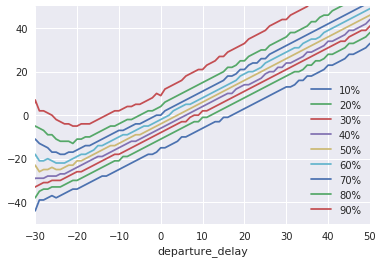

In [4]:
without_extremes = df.drop(['0%', '100%'], 1)
without_extremes.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));

Suppose we were creating a machine learning model to predict the  arrival delay of a flight. Do you think departure delay is a good input  feature? Is this true at all ranges of departure delays?

Hint: Try removing the xlim and ylim from the plotting command.

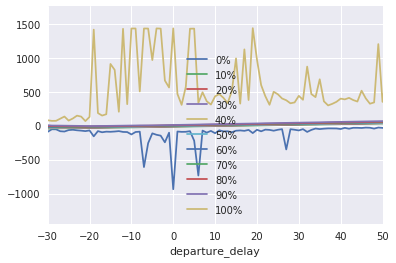

In [8]:
df.plot(x='departure_delay', xlim=(-30,50))